In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [2]:
def concat_dfs(train_df, test_df):
    return pandas.concat([train_df, test_df]).reset_index(drop=True)

def split_dfs(all_dfs):
    train_df = all_dfs.loc[:890]
    test_df = all_dfs.loc[891:].drop('Survived', axis='columns')
    return train_df, test_df

In [3]:
def split_single(df, split_percent=0.8):
    size = df.shape[0]
    split_idx = size * split_percent

    all_targets = df['Survived']
    all_df = df.drop(columns=['Survived'])

    return all_df.loc[:split_idx], all_targets.loc[:split_idx], all_df.loc[split_idx:], all_targets.loc[split_idx:], 

## Load in dataframes and see missing information

In [4]:
train_df = pandas.read_csv("data/train.csv")
test_df = pandas.read_csv("data/test.csv")
all_df = concat_dfs(train_df, test_df)

train_df.name = 'Training Set' 
test_df.name = 'Test Set' 
all_df.name = 'All Data'

In [5]:
all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## A quick analysis

Survived
0    549
1    342
dtype: int64


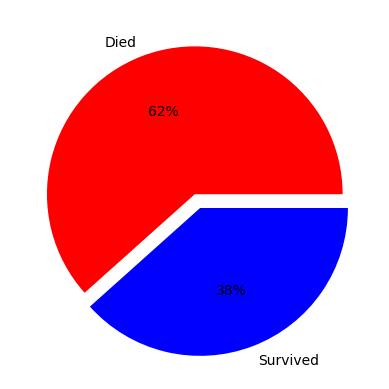

In [7]:
survival_count = train_df.groupby(['Survived']).size()
print(survival_count)

plt.pie(survival_count, labels=['Died', 'Survived'], colors = ['red','blue'], explode=[0,0.1], autopct='%1.0f%%')
plt.show()

## How do sex and class impact survival rate?

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64 

Male Survival rate: 0.18890814558058924
female Survival rate: 0.7420382165605095


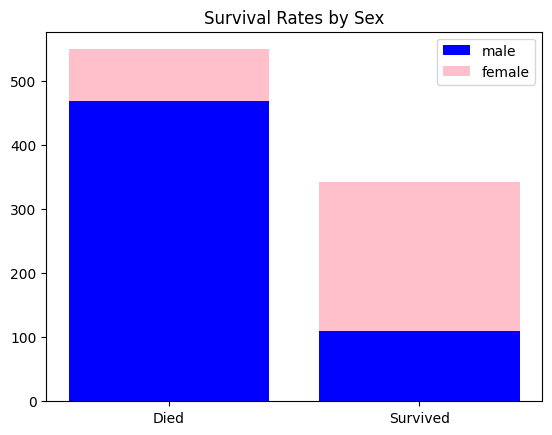

In [8]:
sex_survival_rate = train_df.groupby(['Sex', 'Survived']).size()
sex_count = train_df.groupby(['Sex']).size()
print(sex_survival_rate, "\n")

male_survival_rate = sex_survival_rate['male'][1] / float(sex_count['male'])
female_survival_rate = sex_survival_rate['female'][1] / float(sex_count['female'])

print(f"Male Survival rate: {male_survival_rate}")
print(f"female Survival rate: {female_survival_rate}")

x = ["Died", "Survived"]
y1 = [sex_survival_rate['male'][0], sex_survival_rate['male'][1]]
y2 = [sex_survival_rate['female'][0], sex_survival_rate['female'][1]]

plt.bar(x, y1, color='b', label='male')
plt.bar(x, y2, bottom=y1, color='pink', label='female')
plt.title("Survival Rates by Sex")
plt.legend()
plt.show()

Class 1 survival rate: 0.6296296296296297
Class 2 survival rate: 0.47282608695652173
Class 3 survival rate: 0.24236252545824846



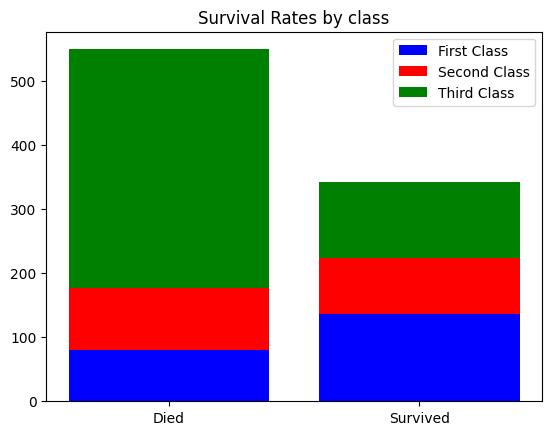

In [9]:
class_survival_rate = train_df.groupby(['Pclass', 'Survived']).size()

for i in range(1,4):
    survival_rate = float(class_survival_rate[i][1]) / (class_survival_rate[i][1] + class_survival_rate[i][0])
    print(f"Class {i} survival rate: {survival_rate}")
print()

x = ['Died', 'Survived']
y1 = numpy.array([class_survival_rate[1][0], class_survival_rate[1][1]])
y2 = numpy.array([class_survival_rate[2][0], class_survival_rate[2][1]])
y3 = numpy.array([class_survival_rate[3][0], class_survival_rate[3][1]])

plt.bar(x, y1, color='b', label='First Class')
plt.bar(x, y2, bottom=y1, color='r', label='Second Class')
plt.bar(x, y3, bottom=y1+y2, color='g', label='Third Class')
plt.title("Survival Rates by class")
plt.legend()
plt.show()


## Fill in the missing 'Embarked' values
With some simple research, we observe that they travelled together and boarded from Southampton

In [10]:
all_df[all_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
all_df['Embarked'] = all_df['Embarked'].fillna('S')

## Filling in a missing fare

With some research, we find that his ticket was 7 pounds and 5 shillings.

In [12]:
all_df[all_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [13]:
all_df['Fare'] = all_df['Fare'].fillna(7.5)

## Engineering a new feature: Family Size

In [14]:
all_df['FamilySize'] = all_df['SibSp'] + all_df['Parch']
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Size: 0  Rate: 0.30353817504655495
Size: 1  Rate: 0.5527950310559007
Size: 2  Rate: 0.5784313725490197
Size: 3  Rate: 0.7241379310344828
Size: 4  Rate: 0.2
Size: 5  Rate: 0.13636363636363635
Size: 6  Rate: 0.3333333333333333
Size: 7  Rate: 0.0
Size: 10  Rate: 0.0


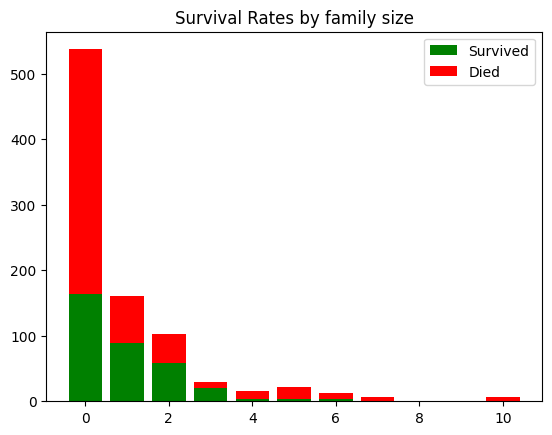

In [15]:
groupby_familySize = all_df.groupby(['FamilySize', 'Survived']).size()

x = sorted(all_df['FamilySize'].unique())

def safeGet(i):
    try:
        return groupby_familySize[i][1]
    except KeyError:
        return 0

y1 = [safeGet(i) for i in x]
y2 = [groupby_familySize[i][0] for i in x]

for i in range(len(x)):
    print(f"Size: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.title('Survival Rates by family size')
plt.legend()
plt.show()


### Binning the family sizes

In [16]:
all_df['FamilySize'] = all_df['FamilySize'].apply(lambda x : 'Alone' if x == 0 else 
                                                 'Small' if x >= 1 and x < 4 else 
                                                 'Medium' if x >= 4 and x < 6 else 
                                                 'Large')

In [17]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone


## Engineering a new feature: Ticket Frequency. Gives a better idea of who was travelling together
This should catch children who travelled with nannies

In [18]:
ticket_counts = all_df.groupby(['Ticket']).size()
ticket_counts.sort_values()

Ticket
345769           1
349245           1
349246           1
349247           1
349248           1
                ..
PC 17608         7
S.O.C. 14879     7
CA 2144          8
1601             8
CA. 2343        11
Length: 929, dtype: int64

In [19]:
def searchTicketCount(ticket):
    return ticket_counts[ticket]

all_df['Ticket Frequency'] = all_df.apply(lambda x: searchTicketCount(x['Ticket']), axis=1)

### Binning ticket frequency

Ticket Frequency  Survived
1                 0.0         351
                  1.0         130
2                 0.0          88
                  1.0          93
3                 0.0          35
                  1.0          66
4                 0.0          12
                  1.0          32
5                 0.0          14
                  1.0           7
6                 0.0          15
                  1.0           4
7                 0.0          19
                  1.0           5
8                 0.0           8
                  1.0           5
11                0.0           7
dtype: int64 

Frequency: 1  Rate: 0.2702702702702703
Frequency: 2  Rate: 0.5138121546961326
Frequency: 3  Rate: 0.6534653465346535
Frequency: 4  Rate: 0.7272727272727273
Frequency: 5  Rate: 0.3333333333333333
Frequency: 6  Rate: 0.21052631578947367
Frequency: 7  Rate: 0.20833333333333334
Frequency: 8  Rate: 0.38461538461538464
Frequency: 11  Rate: 0.0


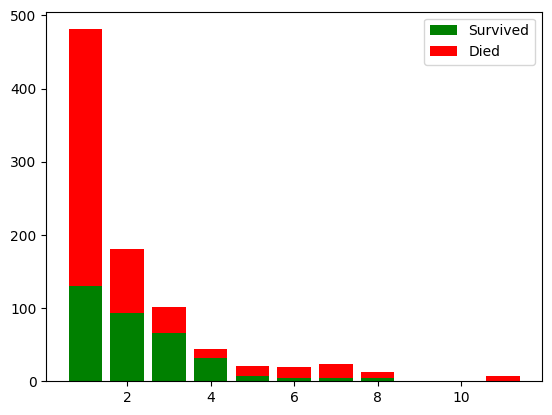

In [20]:
groupby_ticket_freq = all_df.groupby(['Ticket Frequency', 'Survived']).size()

x = sorted(all_df['Ticket Frequency'].unique())
print(groupby_ticket_freq, "\n")

def safeGet(i):
    try:
        return groupby_ticket_freq[i][1]
    except KeyError:
        return 0

y1 = [safeGet(i) for i in x]
y2 = [groupby_ticket_freq[i][0] for i in x]


for i in range(len(x)):
    print(f"Frequency: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

In [21]:
all_df['Ticket Frequency'] = all_df['Ticket Frequency'].apply(lambda x : 'Alone' if x == 1 else 
                                                 'Low' if x >= 2 and x < 5 else 
                                                 'High')

In [22]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Small,Alone
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Small,Low
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Small,Low
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,Alone


## Engineering a new feature: Deck

In [23]:
all_df['Deck'] = all_df['Cabin'].apply(lambda s : s[0] if pandas.notnull(s) else 'M')

unique_decks = sorted(all_df['Deck'].unique())
unique_decks

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T']

In [24]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Small,Alone,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Small,Low,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Alone,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Small,Low,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,Alone,M


## Considering the fares and their relationship to deck

In [25]:
all_df.groupby('Deck')['Fare'].median()

Deck
A    35.0771
B    82.2667
C    86.2896
D    52.5542
E    53.1000
F    13.0000
G    16.7000
M    10.5000
T    35.5000
Name: Fare, dtype: float64

## Binning the Fares

In [26]:
all_df['Fare'] = all_df['Fare'].apply(lambda x: 0 if x <= 7.25 else
                                     1 if x <= 7.75 else 
                                     2 if x <= 7.896 else 
                                     3 if x <= 8.05 else 
                                     4 if x <= 10.5 else 
                                     5 if x <= 13 else 
                                     6 if x <= 15.742 else
                                     7 if x <= 23.25 else
                                     8 if x <= 26.55 else 
                                     9 if x <= 34.075 else
                                     10 if x <= 56.496 else 
                                     11 if x <= 83.475 else
                                     12)

In [27]:
all_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,Small,Alone,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,11,C85,C,Small,Low,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,3,NaN,S,Alone,Alone,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,10,C123,S,Small,Low,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,3,NaN,S,Alone,Alone,M
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,4,NaN,Q,Alone,Alone,M
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,10,E46,S,Alone,Low,E
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,7,NaN,S,Medium,High,M
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,5,NaN,S,Small,Low,M
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,9,NaN,C,Small,Low,M


### Some of the decks have much higher fares. Could this be correlated to class?

In [28]:
deck_counts = all_df.groupby(['Deck']).size()
deck_counts

Deck
A      22
B      65
C      94
D      46
E      41
F      21
G       5
M    1014
T       1
dtype: int64

In [29]:
deck_by_class = all_df.groupby(['Deck', 'Pclass']).size()

In [30]:
deck_by_class

Deck  Pclass
A     1          22
B     1          65
C     1          94
D     1          40
      2           6
E     1          34
      2           4
      3           3
F     2          13
      3           8
G     3           5
M     1          67
      2         254
      3         693
T     1           1
dtype: int64

We can see that A,B,C are all first class cabins. There is one guy in T and he is in first class

Total: 22	 1: 1.0 		 2:0.0 		 3:0.0
Total: 65	 1: 1.0 		 2:0.0 		 3:0.0
Total: 94	 1: 1.0 		 2:0.0 		 3:0.0
Total: 46	 1: 0.8695652173913043 		 2:0.13043478260869565 		 3:0.0
Total: 41	 1: 0.8292682926829268 		 2:0.0975609756097561 		 3:0.07317073170731707
Total: 21	 1: 0.0 		 2:0.6190476190476191 		 3:0.38095238095238093
Total: 5	 1: 0.0 		 2:0.0 		 3:1.0
Total: 1014	 1: 0.06607495069033531 		 2:0.2504930966469428 		 3:0.6834319526627219
Total: 1	 1: 1.0 		 2:0.0 		 3:0.0


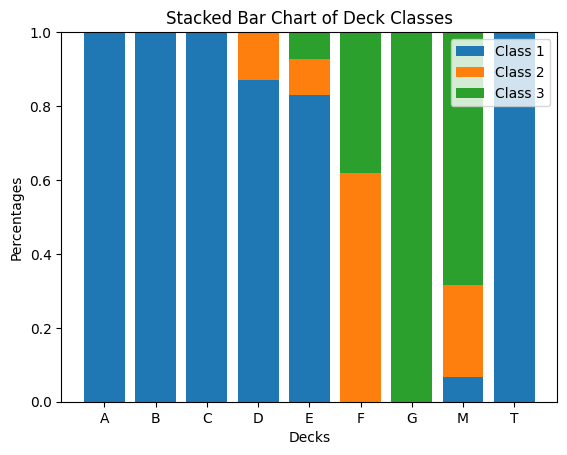

In [31]:
x = unique_decks

WEIGHT = 1

percentClass1 = numpy.array([deck_by_class[deck][1]/deck_counts[deck] * WEIGHT if 1 in deck_by_class[deck] else 0 for deck in unique_decks])
percentClass2 = numpy.array([deck_by_class[deck][2]/deck_counts[deck] * WEIGHT if 2 in deck_by_class[deck] else 0 for deck in unique_decks])
percentClass3 = numpy.array([deck_by_class[deck][3]/deck_counts[deck] * WEIGHT if 3 in deck_by_class[deck] else 0 for deck in unique_decks])

for idx, deck in enumerate(unique_decks):
    print(f"Total: {deck_counts[deck]}\t 1: {percentClass1[idx]} \t\t 2:{percentClass2[idx]} \t\t 3:{percentClass3[idx]}")

# Width of the bars
bar_width = 0.8

# X locations for the groups
x = numpy.arange(len(unique_decks))

# Create the plot
fig, ax = plt.subplots()

# Stacked bar chart
ax.bar(x, percentClass1, bar_width, label='Class 1')
ax.bar(x, percentClass2, bar_width, bottom=percentClass1, label='Class 2')
ax.bar(x, percentClass3, bar_width, bottom=percentClass1 + percentClass2, label='Class 3')

# Add labels, title, and legend
ax.set_xlabel('Decks')
ax.set_ylabel('Percentages')
ax.set_title('Stacked Bar Chart of Deck Classes')
ax.set_xticks(x)
ax.set_xticklabels(unique_decks)
ax.legend()

# Show the plot
plt.show()


## Deck survival rates

In [32]:
train_df, test_df = split_dfs(all_df)

for deck in unique_decks:
    total = len(train_df[train_df['Deck'] == deck])
    survived = len(train_df[(train_df['Deck'] == deck) & (train_df['Survived'] == 1)])
    survival_rate = survived / float(total)
    print(f"Deck: {deck} \t Survival Rate: {survival_rate}")

Deck: A 	 Survival Rate: 0.4666666666666667
Deck: B 	 Survival Rate: 0.7446808510638298
Deck: C 	 Survival Rate: 0.5932203389830508
Deck: D 	 Survival Rate: 0.7575757575757576
Deck: E 	 Survival Rate: 0.75
Deck: F 	 Survival Rate: 0.6153846153846154
Deck: G 	 Survival Rate: 0.5
Deck: M 	 Survival Rate: 0.29985443959243085
Deck: T 	 Survival Rate: 0.0


## Considering classes and deck survival rates, I will group like so:
(A,B,C,T), (D,E), (F,G), M

In [33]:
ABCT = ['A','B','C','T']
DE = ['D','E']
FG = ['F','G']
all_df['Deck'] = all_df['Deck'].apply(lambda x: 
                                      'ABCT' if x in ABCT else 
                                      'DE' if x in DE else 
                                      'FG' if x in FG else x)

## Parsing the names

In [34]:
all_df['Family Name'] = all_df['Name'].apply(lambda s : s.split(',')[0].strip())
all_df['Title'] = all_df['Name'].apply(lambda s : s.split(',')[1].split('.')[0].strip())

In [35]:
print(all_df['Title'].unique())
all_df.groupby(['Title','Sex']).size()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Title         Sex   
Capt          male        1
Col           male        4
Don           male        1
Dona          female      1
Dr            female      1
              male        7
Jonkheer      male        1
Lady          female      1
Major         male        2
Master        male       61
Miss          female    260
Mlle          female      2
Mme           female      1
Mr            male      757
Mrs           female    197
Ms            female      2
Rev           male        8
Sir           male        1
the Countess  female      1
dtype: int64

In [36]:
train_df, test_df = split_dfs(all_df)

survival_by_title = train_df.groupby(['Title','Survived']).size()
survival_by_title

Title         Survived
Capt          0.0           1
Col           0.0           1
              1.0           1
Don           0.0           1
Dr            0.0           4
              1.0           3
Jonkheer      0.0           1
Lady          1.0           1
Major         0.0           1
              1.0           1
Master        0.0          17
              1.0          23
Miss          0.0          55
              1.0         127
Mlle          1.0           2
Mme           1.0           1
Mr            0.0         436
              1.0          81
Mrs           0.0          26
              1.0          99
Ms            1.0           1
Rev           0.0           6
Sir           1.0           1
the Countess  1.0           1
dtype: int64

Title: Capt  Rate: 0.0
Title: Col  Rate: 0.5
Title: Don  Rate: 0.0
Title: Dr  Rate: 0.42857142857142855
Title: Jonkheer  Rate: 0.0
Title: Lady  Rate: 1.0
Title: Major  Rate: 0.5
Title: Master  Rate: 0.575
Title: Miss  Rate: 0.6978021978021978
Title: Mlle  Rate: 1.0
Title: Mme  Rate: 1.0
Title: Mr  Rate: 0.15667311411992263
Title: Mrs  Rate: 0.792
Title: Ms  Rate: 1.0
Title: Rev  Rate: 0.0
Title: Sir  Rate: 1.0
Title: the Countess  Rate: 1.0


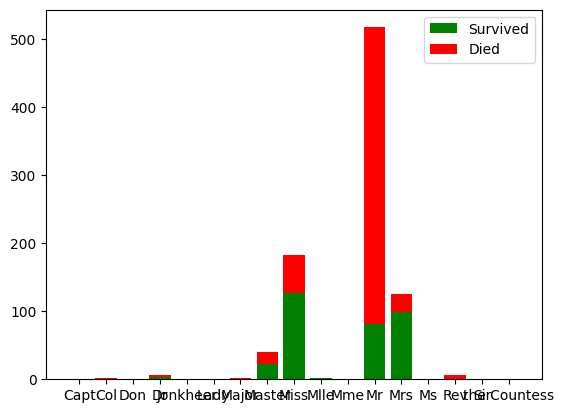

In [37]:
x = sorted(train_df['Title'].unique())

def safeGet(i, survived):
    try:
        return survival_by_title[x[i]][survived]
    except KeyError:
        return 0

y1 = [safeGet(i,1) for i in range(len(x))]
y2 = [safeGet(i,0) for i in range(len(x))]

for i in range(len(x)):
    print(f"Title: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

In [38]:
def isMarried(x):
    if (x == 'Mrs' or x == 'Mme'):
        return 1
    else:
        return 0

all_df['isMarried'] = all_df['Title'].apply(isMarried)

In [39]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck,Family Name,Title,isMarried
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,Small,Alone,M,Braund,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,11,C85,C,Small,Low,ABCT,Cumings,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,3,NaN,S,Alone,Alone,M,Heikkinen,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,10,C123,S,Small,Low,ABCT,Futrelle,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,3,NaN,S,Alone,Alone,M,Allen,Mr,0


## Handling the missing age values

Age is most correlated with title and class

In [40]:
age_by_title_and_class = all_df.groupby(['Title', 'Pclass'])['Age'].median().reset_index()
age_by_title_and_class

,Title,Pclass,Age
0,Capt,1,70.0
1,Col,1,54.5
2,Don,1,40.0
3,Dona,1,39.0
4,Dr,1,49.0
5,Dr,2,38.5
6,Jonkheer,1,38.0
7,Lady,1,48.0
8,Major,1,48.5
9,Master,1,6.0


In [41]:
def fill_missing_age(row):
    if pandas.isnull(row['Age']):
        median_age = age_by_title_and_class[
            (age_by_title_and_class['Title'] == row['Title']) & 
            (age_by_title_and_class['Pclass'] == row['Pclass'])
        ]['Age'].values[0]
        return median_age
    else:
        return row['Age']

In [42]:
all_df['Age'] = all_df.apply(fill_missing_age, axis=1)

In [43]:
# One anomaly is still null

all_df[all_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck,Family Name,Title,isMarried
979,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,1,NaN,Q,Alone,Alone,M,O'Donoghue,Ms,0


In [44]:
all_df.groupby(['Pclass'])['Age'].median() # so fill it in with her class

Pclass
1    41.5
2    29.0
3    26.0
Name: Age, dtype: float64

In [45]:
all_df['Age'] = all_df['Age'].fillna(26)

## Binning the ages

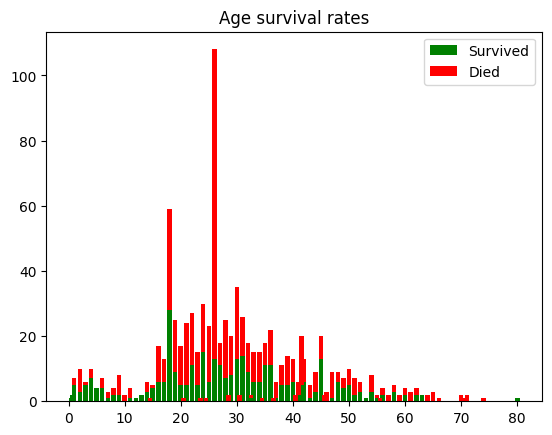

In [46]:
train_df, test_df = split_dfs(all_df)

groupby_Age = train_df.groupby(['Age', 'Survived']).size()

x = sorted(train_df['Age'].unique()) # unique ages

def safeGet(i, survived):
    try:
        return groupby_Age[i][survived]
    except KeyError:
        return 0

y1 = [safeGet(i, 1) for i in x]
y2 = [safeGet(i, 0) for i in x]

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.title("Age survival rates")
plt.legend()
plt.show()

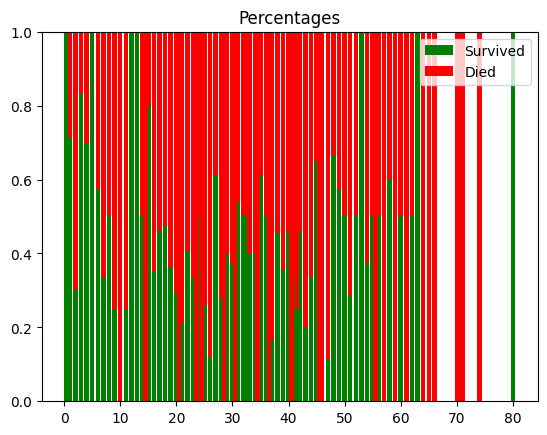

In [47]:
y1 = [safeGet(i, 1) / (safeGet(i, 1) + safeGet(i, 0)) for i in x]
y2 = [safeGet(i, 0) / (safeGet(i, 1) + safeGet(i, 0))for i in x]

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.title("Percentages")
plt.show()

In [48]:
all_df['Age'] = all_df['Age'].apply(lambda x: 'Child' if x < 10 else
                                   'Teen' if x < 20 else
                                   'Twenties' if x < 30 else 
                                   'Thirties' if x < 40 else 
                                   'Early Fourties' if x < 46 else
                                   'Approaching Senior' if x < 55 else
                                   'Senior' if x < 64 else
                                   'Old')

In [49]:
from sklearn.preprocessing import LabelEncoder

ageEncoder = LabelEncoder()
ageEncoder.fit(all_df['Age'].unique())
all_df['Age'] = ageEncoder.transform(all_df['Age'])

Age: 0  Rate: 0.4166666666666667
Age: 1  Rate: 0.6060606060606061
Age: 2  Rate: 0.4
Age: 3  Rate: 0.07692307692307693
Age: 4  Rate: 0.41379310344827586
Age: 5  Rate: 0.4444444444444444
Age: 6  Rate: 0.44086021505376344
Age: 7  Rate: 0.27564102564102566


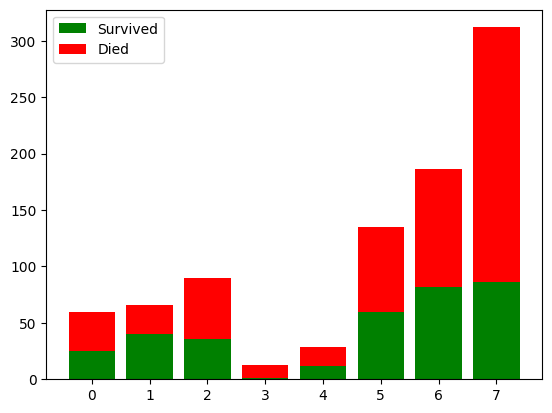

In [50]:
train_df, test_df = split_dfs(all_df)

groupby_Age = train_df.groupby(['Age', 'Survived']).size()

x = sorted(train_df['Age'].unique()) # unique ages

def safeGet(i, survived):
    try:
        return groupby_Age[i][survived]
    except KeyError:
        return 0

y1 = [safeGet(i, 1) for i in x]
y2 = [safeGet(i, 0) for i in x]


for i in range(len(x)):
    print(f"Age: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

### Grouping the titles by sex and status

In [51]:
def bin_title(x):
    female_general = ['Miss','Mrs','Ms','Mme','Mlle']
    if x == 'Mr':
        return 'Mr'
    elif x in female_general:
        return 'Ms'
    elif x == 'Master':
        return 'Master'
    else:
        return 'other'

all_df['Title'] = all_df['Title'].apply(bin_title)

In [52]:
all_df.groupby(['Title']).size()

Title
Master     61
Mr        757
Ms        462
other      29
dtype: int64

Title: Master  Rate: 0.575
Title: Mr  Rate: 0.15667311411992263
Title: Ms  Rate: 0.7395498392282959
Title: other  Rate: 0.34782608695652173


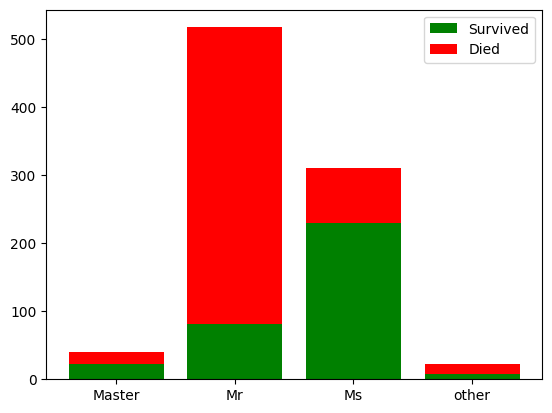

In [53]:
train_df, test_df = split_dfs(all_df)

survival_by_title = train_df.groupby(['Title','Survived']).size()

x = sorted(train_df['Title'].unique())

def safeGet(i, survived):
    try:
        return survival_by_title[x[i]][survived]
    except KeyError:
        return 0

y1 = [safeGet(i,1) for i in range(len(x))]
y2 = [safeGet(i,0) for i in range(len(x))]

for i in range(len(x)):
    print(f"Title: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

In [54]:
all_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck,Family Name,Title,isMarried
0,1,0.0,3,"Braund, Mr. Owen Harris",male,7,1,0,A/5 21171,0,NaN,S,Small,Alone,M,Braund,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,6,1,0,PC 17599,11,C85,C,Small,Low,ABCT,Cumings,Ms,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,7,0,0,STON/O2. 3101282,3,NaN,S,Alone,Alone,M,Heikkinen,Ms,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,6,1,0,113803,10,C123,S,Small,Low,ABCT,Futrelle,Ms,1
4,5,0.0,3,"Allen, Mr. William Henry",male,6,0,0,373450,3,NaN,S,Alone,Alone,M,Allen,Mr,0
5,6,0.0,3,"Moran, Mr. James",male,7,0,0,330877,4,NaN,Q,Alone,Alone,M,Moran,Mr,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,0,0,0,17463,10,E46,S,Alone,Low,DE,McCarthy,Mr,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,1,3,1,349909,7,NaN,S,Medium,High,M,Palsson,Master,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,7,0,2,347742,5,NaN,S,Small,Low,M,Johnson,Ms,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,5,1,0,237736,9,NaN,C,Small,Low,M,Nasser,Ms,1


## Encode everything

In [55]:
from sklearn.preprocessing import LabelEncoder

all_df['Sex'] = LabelEncoder().fit_transform(all_df['Sex'])
all_df['Deck'] = LabelEncoder().fit_transform(all_df['Deck'])
all_df['FamilySize'] = LabelEncoder().fit_transform(all_df['FamilySize'])
all_df['Ticket Frequency'] = LabelEncoder().fit_transform(all_df['Ticket Frequency'])
all_df['Fare'] = LabelEncoder().fit_transform(all_df['Fare'])
all_df['Title'] = LabelEncoder().fit_transform(all_df['Title'])
all_df['Family Name'] = LabelEncoder().fit_transform(all_df['Family Name'])
all_df['Embarked'] = LabelEncoder().fit_transform(all_df['Embarked'])
all_df['Fare'] = LabelEncoder().fit_transform(all_df['Fare'])

In [56]:
all_df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       1309 non-null   int64  
 1   Survived          891 non-null    float64
 2   Pclass            1309 non-null   int64  
 3   Name              1309 non-null   object 
 4   Sex               1309 non-null   int64  
 5   Age               1309 non-null   int64  
 6   SibSp             1309 non-null   int64  
 7   Parch             1309 non-null   int64  
 8   Ticket            1309 non-null   object 
 9   Fare              1309 non-null   int64  
 10  Cabin             295 non-null    object 
 11  Embarked          1309 non-null   int64  
 12  FamilySize        1309 non-null   int64  
 13  Ticket Frequency  1309 non-null   int64  
 14  Deck              1309 non-null   int64  
 15  Family Name       1309 non-null   int64  
 16  Title             1309 non-null   int64  


## Drop the useless columns

In [57]:
all_df = all_df.drop(columns=['PassengerId', 'Name','Ticket','Cabin'])

## Split the dataframes

In [58]:
train_df, test_df = split_dfs(all_df)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train = StandardScaler().fit_transform(train_df.drop(columns=['Survived']))
y_train = train_df['Survived']
X_test = StandardScaler().fit_transform(test_df)

### The randomforest hyperparameters were calculated via GridSearchCV. Raw code is below

Params found:

max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=100 (0.7703 on Kaggle)

{'max_depth': 40, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

{'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}

## Test run by dividing the training set and running cross_validation

In [60]:
train_data, test_data, train_targets, test_targets = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Mean: 86.4894
Min: 84.92
Max: 88.27


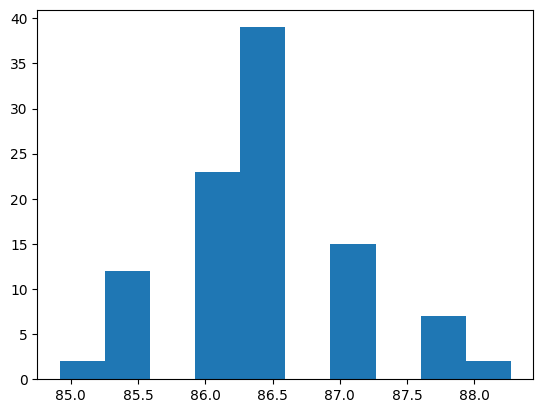

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_depth=10,max_features='log2',min_samples_leaf=2,min_samples_split=2,n_estimators=100)

def eval_model(model):
    randomforest = model
    randomforest.fit(train_data, train_targets)
    y_pred = randomforest.predict(test_data)    
    accuracy_rf = round(accuracy_score(y_pred, test_targets) * 100, 2)
    return accuracy_rf
    
def eval_model_k_times(model, k=100):
    all_scores = []
    min = 100
    max = 0
    sum = 0
    for i in range(k):  
        accuracy_rf = eval_model(model)

        all_scores.append(accuracy_rf)
        min = accuracy_rf if accuracy_rf < min else min
        max = accuracy_rf if accuracy_rf > max else max
        sum += accuracy_rf

    mean = sum / k
    print(f"Mean: {mean}")
    print(f"Min: {min}")
    print(f"Max: {max}")
    plt.hist(all_scores)

eval_model_k_times(rf)

In [183]:
from sklearn.model_selection import KFold, cross_val_score

# Initialize the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True)

# Perform cross-validation
scores = cross_val_score(rf, X_train, y_train, cv=kf)

# Print the results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())


Cross-validation scores: [0.81005587 0.81460674 0.86516854 0.81460674 0.91011236]
Mean accuracy: 0.842910049588852
Standard deviation of accuracy: 0.03922535583845532


## Kaggle Submission

In [65]:
rf.fit(X_train,y_train)
y_predicted = rf.predict(X_test)

In [66]:
import csv

fieldnames = ["PassengerId", "Survived"]
predictions_dict = []
for i, index in enumerate(test_df.index.values):
    prediction = {
        "PassengerId": index + 1,
        "Survived": int(y_predicted[i])
    }
    predictions_dict.append(prediction)

with open('data/predictions.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(predictions_dict)